In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [8]:
brunson_data = pd.read_csv("../data/jalen_brunson.csv")

In [10]:
inactive = brunson_data["2P"] == "Inactive"
no_dress = brunson_data["2P"] == "Did Not Dress"

brunson_data_cleaned = brunson_data.drop(brunson_data[inactive | no_dress].index)


In [ ]:
print(brunson_data_cleaned.tail(3))
# Removed the last row because it's just a season total.
brunson_data_cleaned2 = brunson_data_cleaned[:-1]


      Rk   Gcar   Gtm        Date Team Unnamed: 5  Opp     Result  GS     MP  \
79  64.0  486.0  80.0  2025-04-10  NYK          @  DET  L 106-115   1  29:17   
80  65.0  487.0  81.0  2025-04-11  NYK        NaN  CLE  L 102-108   1  36:17   
82   NaN    NaN   NaN         NaN  NaN        NaN  NaN      40-25  65   2301   

    ...  DRB  TRB  AST STL BLK  TOV   PF   PTS  GmSc  +/-  
79  ...    0    2    5   0   2    3    2    15   7.8  -11  
80  ...    1    1    2   1   0    3    1    27  17.6   -6  
82  ...  160  187  475  60   8  164  138  1690  20.0  146  

[3 rows x 34 columns]


In [ ]:

brunson_data_cleaned2["Home/Away"] = brunson_data_cleaned2["Unnamed: 5"].apply(
    lambda x: "Away" if "@" in str(x) else "Home"
)


/var/folders/z_/j64wvfz51r91wny8ltdk6mjh0000gn/T/ipykernel_16371/2471494606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brunson_data_cleaned2["Home/Away"] = brunson_data_cleaned2["Unnamed: 5"].apply(


In [14]:
cols = ["PTS", "AST", "TRB", "TOV", "FG%"]
for col in cols:
    brunson_data_cleaned2[col] = pd.to_numeric(brunson_data_cleaned2[col], errors="coerce")


/var/folders/z_/j64wvfz51r91wny8ltdk6mjh0000gn/T/ipykernel_16371/998015343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brunson_data_cleaned2[col] = pd.to_numeric(brunson_data_cleaned2[col], errors="coerce")


In [16]:
home_away_avg = brunson_data_cleaned2.groupby("Home/Away")[["PTS", "AST", "TRB", "TOV",]].mean().round(2)
print(home_away_avg)


             PTS   AST   TRB   TOV
Home/Away                         
Away       26.97  6.97  3.10  2.74
Home       25.12  7.62  2.68  2.32


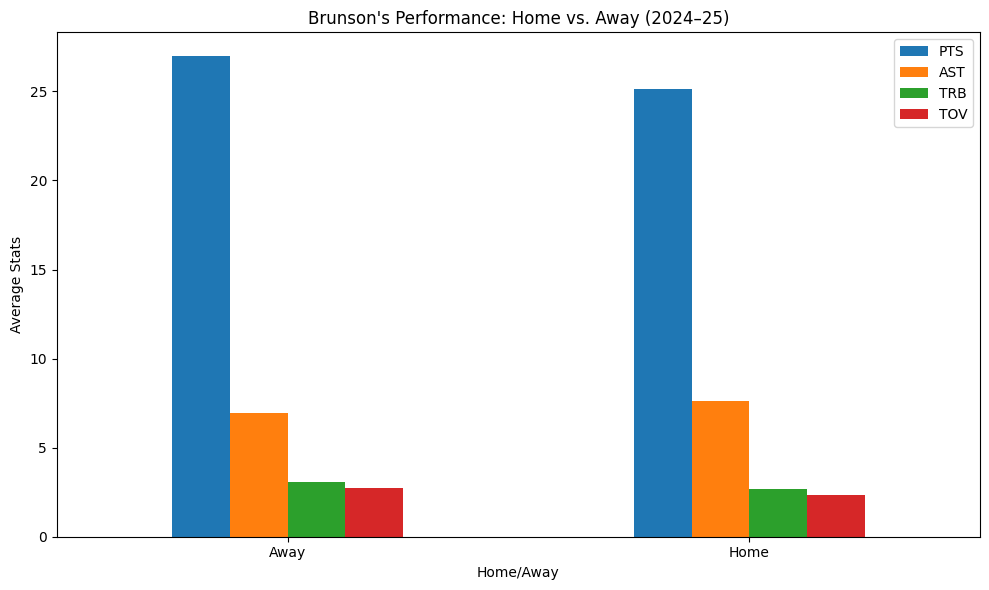

In [17]:
import matplotlib.pyplot as plt

home_away_avg.plot(kind='bar', figsize=(10,6))
plt.title("Brunson's Performance: Home vs. Away (2024–25)")
plt.ylabel("Average Stats")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
